In [1]:
#load the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
tf.debugging.set_log_device_placement(False) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generating reproducible results from same code
tf.random.set_seed(14)

In [3]:
raw = pd.read_csv("D:\Assignments\gas_turbines.csv")
raw.head() 
#TEY is the variable we should predict.

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
df = raw.copy() 
df = df.drop(['AFDP','GTEP','TIT','TAT','CDP','CO','NOX'],axis=1)
df.head()

,AT,AP,AH,TEY
0,6.8594,1007.9,96.799,114.70
1,6.7850,1008.4,97.118,114.72
2,6.8977,1008.8,95.939,114.71
3,7.0569,1009.2,95.249,114.72
4,7.3978,1009.7,95.150,114.72


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   TEY     15039 non-null  float64
dtypes: float64(4)
memory usage: 470.1 KB


In [6]:
df.describe()

,AT,AP,AH,TEY
count,15039.000000,15039.00000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,134.188464
std,7.574323,6.41076,13.793439,15.829717
min,0.522300,985.85000,30.344000,100.170000
25%,11.408000,1008.90000,69.750000,127.985000
50%,18.186000,1012.80000,82.266000,133.780000
75%,23.862500,1016.90000,90.043500,140.895000
max,34.929000,1034.20000,100.200000,174.610000


All features in the dataset can be used in model building. This is a Regression Problem.

Train | Split dataset

In [7]:
X =df.iloc[:,:-1]
Y = df.iloc[:,-1]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

A common mistake when configuring a neural network is to first normalize the data before splitting the data.

In [8]:
y_train=np.reshape(y_train.to_numpy(), (-1,1)) 
y_test=np.reshape(y_test.to_numpy(), (-1,1)) 

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

print(scaler_x.fit(X_train))
xtrain_scale=scaler_x.transform(X_train)

print(scaler_x.fit(X_test))
xtest_scale=scaler_x.transform(X_test)

print(scaler_y.fit(y_train))
ytrain_scale=scaler_y.transform(y_train)

print(scaler_y.fit(y_test))
ytest_scale=scaler_y.transform(y_test)

MinMaxScaler()
MinMaxScaler()
MinMaxScaler()
MinMaxScaler()


In [10]:
len(xtrain_scale)

10527

Neural Network Modelling

In [11]:
#Building the Model

# Create your first MLP in Keras
import keras 
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# create model
model1 = Sequential()
model1.add(Dense(4, input_dim=3, kernel_initializer='normal', activation='relu'))
model1.add(Dense(2106,kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, activation='linear'))
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse','mae'])
# Fit the model
hist1 = model1.fit(xtrain_scale, ytrain_scale, validation_split=0.33, epochs=100, batch_size=150)
#At epoch 50, mse and mae just keeps oscillating back and forth

Epoch 1/100
48/48 [==============================] - 1s 7ms/step - loss: 0.0700 - mse: 0.0700 - mae: 0.2047 - val_loss: 0.0446 - val_mse: 0.0446 - val_mae: 0.1632
Epoch 2/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0455 - mse: 0.0455 - mae: 0.1594 - val_loss: 0.0425 - val_mse: 0.0425 - val_mae: 0.1541
Epoch 3/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0442 - mse: 0.0442 - mae: 0.1597 - val_loss: 0.0408 - val_mse: 0.0408 - val_mae: 0.1523
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0428 - mse: 0.0428 - mae: 0.1597 - val_loss: 0.0400 - val_mse: 0.0400 - val_mae: 0.1516
Epoch 5/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0422 - mse: 0.0422 - mae: 0.1595 - val_loss: 0.0394 - val_mse: 0.0394 - val_mae: 0.1539
Epoch 6/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0417 - mse: 0.0417 - mae: 0.1613 - val_loss: 0.0403 - val_mse: 0.0403 - val_mae: 0.1574
Epoch 7/100
48/48 [===

48/48 [==============================] - 0s 5ms/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1586 - val_loss: 0.0386 - val_mse: 0.0386 - val_mae: 0.1578
Epoch 52/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0398 - mse: 0.0398 - mae: 0.1591 - val_loss: 0.0375 - val_mse: 0.0375 - val_mae: 0.1537
Epoch 53/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0391 - mse: 0.0391 - mae: 0.1573 - val_loss: 0.0376 - val_mse: 0.0376 - val_mae: 0.1512
Epoch 54/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0394 - mse: 0.0394 - mae: 0.1579 - val_loss: 0.0377 - val_mse: 0.0377 - val_mae: 0.1533
Epoch 55/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1587 - val_loss: 0.0383 - val_mse: 0.0383 - val_mae: 0.1567
Epoch 56/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0396 - mse: 0.0396 - mae: 0.1583 - val_loss: 0.0376 - val_mse: 0.0376 - val_mae: 0.1530
Epoch 57/100
48/48 [=========

Model Evaluation

In [13]:
y_predict = model1.predict(xtest_scale)

141/141 [==============================] - 0s 978us/step


In [14]:
print(hist1.history.keys())

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


In [15]:
hist1_df = pd.DataFrame(hist1.history)
hist1_df["epoch"]=hist1.epoch
hist1_df.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
95,0.038444,0.038444,0.154730,0.038079,0.038079,0.152800,95
96,0.039128,0.039128,0.157605,0.037382,0.037382,0.152380,96
97,0.038852,0.038852,0.156413,0.037098,0.037098,0.151804,97
98,0.038387,0.038387,0.154030,0.036970,0.036970,0.150289,98
99,0.038515,0.038515,0.155370,0.036835,0.036835,0.150404,99


Visualize Training History

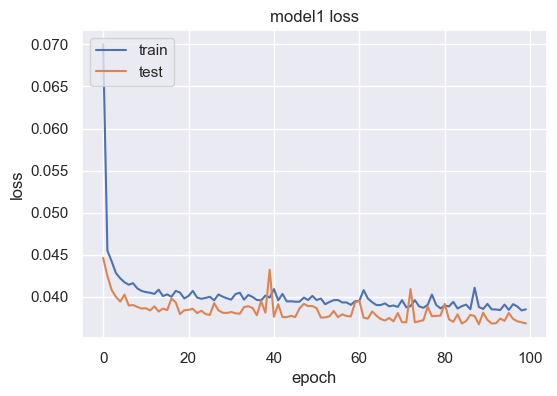

In [16]:
# summarize history for Loss

sns.set(rc={'figure.figsize':(6,4)})

plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

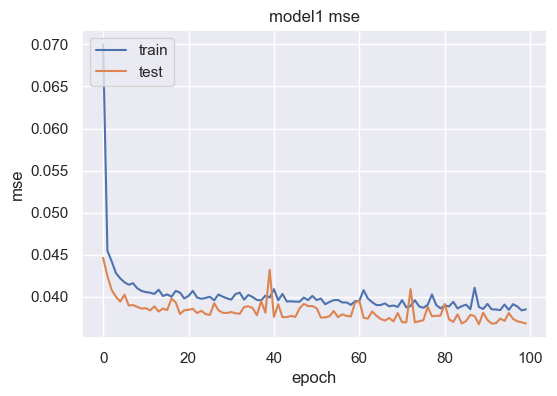

In [17]:
# summarize history for loss
plt.plot(hist1.history['mse'])
plt.plot(hist1.history['val_mse'])
plt.title('model1 mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() 